<a href="https://colab.research.google.com/github/luigiselmi/dl_tensorflow/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow and Keras
Tensorflow is a deep learning framewok that supports all the mathematical operations on tensors, provides the basic components to build a neural network such as different kind of layers and activation functions, and optimizers, and supports the automatic differentiation to perform the backpropagation algorithm. Keras is a high level API on top of Tensorflow.

## Tensors and variables
Tensors are multidimensional arrays. In Tensorflow a scalar is a tensor of rank 0, a vector a tensor of rank 1, a matrix a tensor of rank 2, and so forth. A tensor values cannot be modified after it has been created so it is said to be immutable. A variable can be modified, therefore it is mutable.

In [76]:
import tensorflow as tf

In [77]:
x = tf.constant(1.)
print(x)

tf.Tensor(1.0, shape=(), dtype=float32)


In [78]:
x = tf.ones(shape=(3, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]
 [1.]], shape=(3, 1), dtype=float32)


In [79]:
x = tf.zeros(shape=(3, 1))
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>

In [80]:
x = tf.random.uniform(shape=(10, 1), minval=0., maxval=1.0)
x

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.68751216],
       [0.43099535],
       [0.03777003],
       [0.17887688],
       [0.57881355],
       [0.7174876 ],
       [0.16394901],
       [0.34651494],
       [0.71211886],
       [0.7595334 ]], dtype=float32)>

In [81]:
x = tf.random.normal(shape=(10, 1), mean=0.0, stddev=1.0)
x

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 1.0402145 ],
       [ 0.12555276],
       [ 1.0427619 ],
       [-0.06690285],
       [ 1.2470084 ],
       [ 0.8652899 ],
       [ 0.5575337 ],
       [ 1.3601174 ],
       [-1.552663  ],
       [ 0.78349155]], dtype=float32)>

If we try to change the value of a tensor we get an error

In [82]:
x[0] = 1

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

In [ ]:
v[0].assign(1.)

In [ ]:
print(v)

## Tensor operations
Here few examples of operation on tensors.

In [39]:
tf.square(4)

<tf.Tensor: shape=(), dtype=int32, numpy=16>

### Vector product

In [54]:
a = tf.constant([1, 2, -1], shape=(3,1)) # column vector
b = tf.constant([1, -1, -1], shape=(3,1))
b = tf.transpose(b) # row vector
a.shape, b.shape

(TensorShape([3, 1]), TensorShape([1, 3]))

In [55]:
tf.matmul(b,a)

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[0]], dtype=int32)>

### Gradient
We can compute the derivative of a function F(x) of an input variable x. For example

$$f(x) = x^2$$

so that

$$\frac{df}{dx} = 2x$$

and

$$\left (\frac{df}{dx} \right)_{x=3}  = 6$$


In [57]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
  gradient = tape.gradient(result, input_var)

gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

## 2nd order derivative
We can use the GradientTape to compute the 2nd order derivative of a function, for example the height with time of a body of unit mass falling from a height H is

$$y = H - \frac {1}{2}gt^2$$

the 1st derivative, its speed v, is

$$v = \frac{dy}{dt} = gt$$

and its accelleration a is

$$a = \frac{d^2y}{dt^2} = g$$

In [63]:
g = 9.4 # m/s^2
H = 100 # m
t = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    y = (1/2) * g * t ** 2
    v = inner_tape.gradient(y, t)
  a = outer_tape.gradient(v, t)
print(a == g)

tf.Tensor(True, shape=(), dtype=bool)


## A linear classifier
We create two sets of synthetic data points, positives and negatives, in a 2D plane and we will compute a linear classifier that will tell the class a new data point belongs to depending on its coordinates.

In [65]:
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
mean=[0, 3],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
mean=[3, 0],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)

In [66]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [67]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

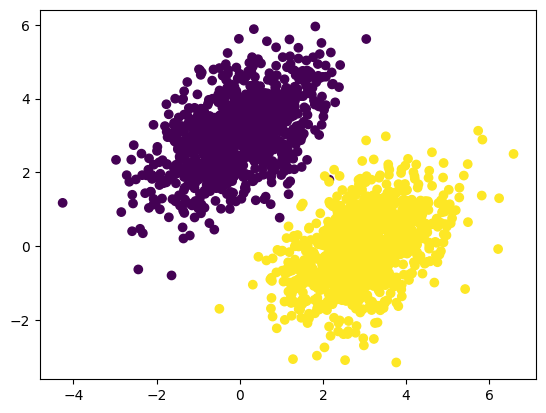

In [68]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [69]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [70]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [71]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [72]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [73]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.8865
Loss at step 1: 0.3233
Loss at step 2: 0.1429
Loss at step 3: 0.1156
Loss at step 4: 0.1058
Loss at step 5: 0.0986
Loss at step 6: 0.0921
Loss at step 7: 0.0863
Loss at step 8: 0.0809
Loss at step 9: 0.0760
Loss at step 10: 0.0716
Loss at step 11: 0.0675
Loss at step 12: 0.0637
Loss at step 13: 0.0603
Loss at step 14: 0.0572
Loss at step 15: 0.0544
Loss at step 16: 0.0518
Loss at step 17: 0.0494
Loss at step 18: 0.0472
Loss at step 19: 0.0452
Loss at step 20: 0.0434
Loss at step 21: 0.0418
Loss at step 22: 0.0403
Loss at step 23: 0.0389
Loss at step 24: 0.0376
Loss at step 25: 0.0365
Loss at step 26: 0.0354
Loss at step 27: 0.0344
Loss at step 28: 0.0336
Loss at step 29: 0.0328
Loss at step 30: 0.0320
Loss at step 31: 0.0314
Loss at step 32: 0.0307
Loss at step 33: 0.0302
Loss at step 34: 0.0297
Loss at step 35: 0.0292
Loss at step 36: 0.0288
Loss at step 37: 0.0284
Loss at step 38: 0.0280
Loss at step 39: 0.0277


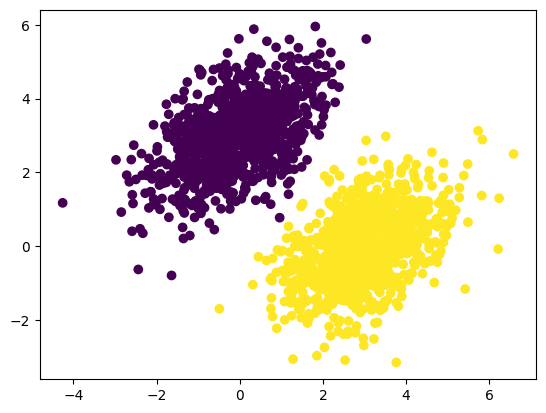

In [74]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

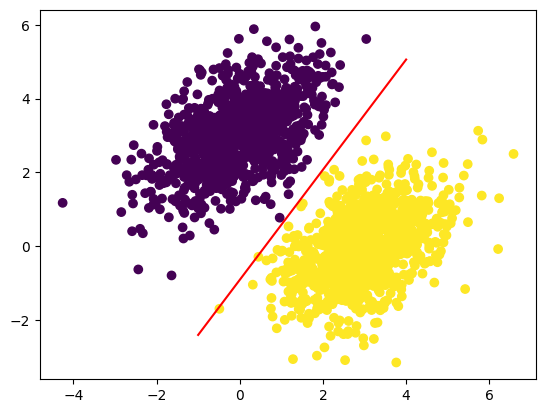

In [75]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)